## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import pandas as pd

var_list = ['marital', 'age', 'happy', 'income', 'health'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to

phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

I chose 5 variables: marital, age, happy, income, and health. Marital is a categorical variable that tells a person’s marital status: married, widowed, divorced, separated, never married. Age is a numerical variable that tells the person’s age. Happy is a categorical variable that tells how happy a person is: very happy, pretty happy, not too happy. Income is a categorical variable that tells a person’s total family income. It consists of income brackets from under $1000 to over $25000 split by many increments. Health is a categorical variable that tells how healthy a person is: excellent, good, fair, poor. I chose these variables because I want to look at the relationship between marital and happiness, martial and income, age and happiness, age and health, happiness and income, and happiness and health. 

In [18]:
df = pd.read_csv('./selected_gss_data.csv')
print(df.head())

         marital   age          happy income     health
0  never married  23.0  not too happy    NaN       good
1        married  70.0  not too happy    NaN       fair
2        married  48.0   pretty happy    NaN  excellent
3        married  27.0  not too happy    NaN       good
4        married  61.0   pretty happy    NaN       good


In [29]:
print(df.info(), "\n") # check if variable types are good

print(df.isnull().sum(), "\n") # check for missing values
df1 = df.dropna() # drop all rows with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   marital  72339 non-null  object 
 1   age      71621 non-null  float64
 2   happy    67588 non-null  object 
 3   income   63439 non-null  object 
 4   health   55154 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.8+ MB
None 

marital       51
age          769
happy       4802
income      8951
health     17236
dtype: int64 



In [30]:
print(df1['marital'].value_counts(), "\n")
print(df1['age'].describe(), "\n")
print(df1['happy'].value_counts(), "\n")
print(df1['income'].value_counts(), "\n")
print(df1['health'].value_counts(), "\n")

marital
married          23570
never married     9841
divorced          6121
widowed           3903
separated         1521
Name: count, dtype: int64 

count    44956.000000
mean        46.217079
std         17.304537
min         18.000000
25%         32.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64 

happy
pretty happy     25035
very happy       13505
not too happy     6416
Name: count, dtype: int64 

income
$25,000 or more       24024
$10,000 to $14,999     5068
$20,000 to $24,999     3885
$15,000 to $19,999     3821
$8,000 to $9,999       1714
$1,000 to $2,999       1095
$7,000 to $7,999        993
$5,000 to $5,999        967
$3,000 to $3,999        957
$6,000 to $6,999        904
$4,000 to $4,999        874
under $1,000            654
Name: count, dtype: int64 

health
good         20948
excellent    12957
fair          8656
poor          2395
Name: count, dtype: int64 



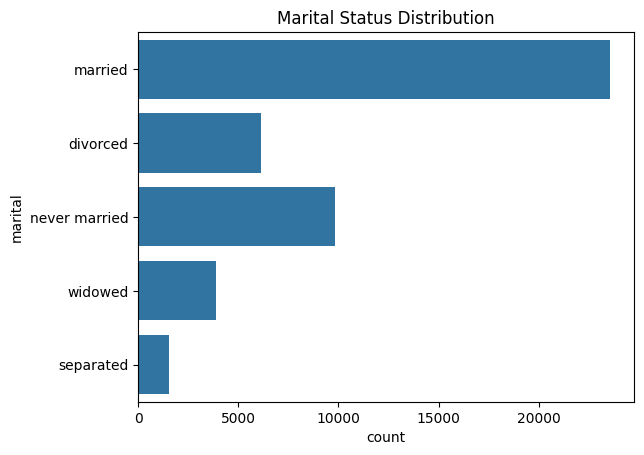

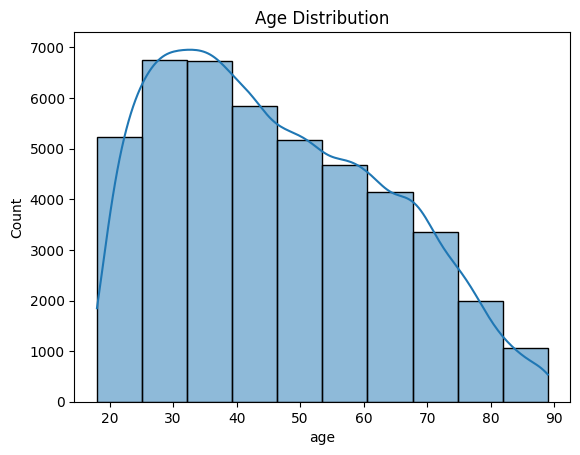

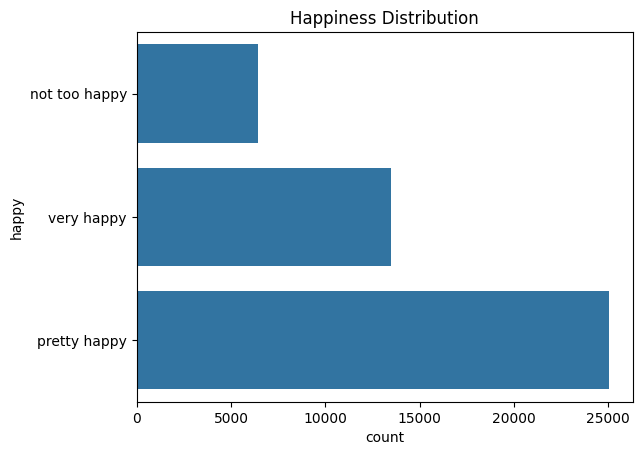

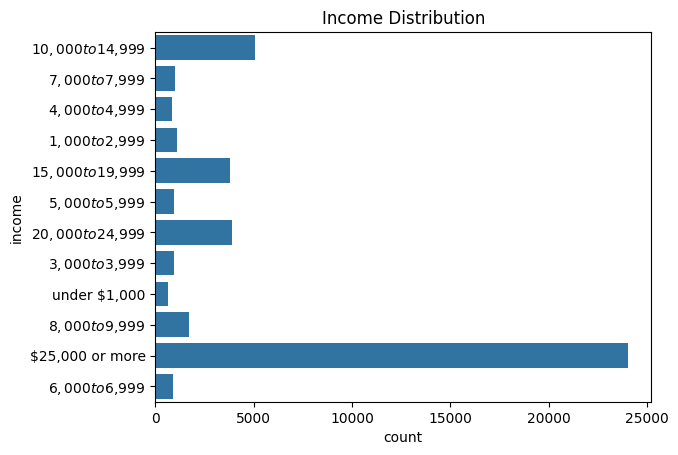

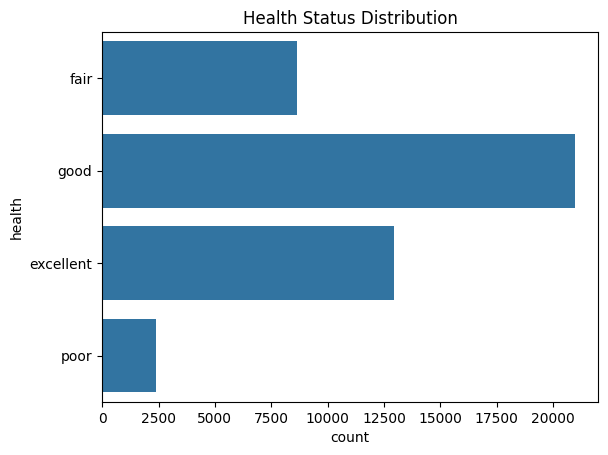

In [53]:
sns.countplot(df1['marital'])
plt.title("Marital Status Distribution")
plt.show()

sns.histplot(df1['age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(df1['happy'])
plt.title("Happiness Distribution")
plt.show()

sns.countplot(df1['income'])
plt.title("Income Distribution")
plt.show()

sns.countplot(df1['health'])
plt.title("Health Status Distribution")
plt.show()

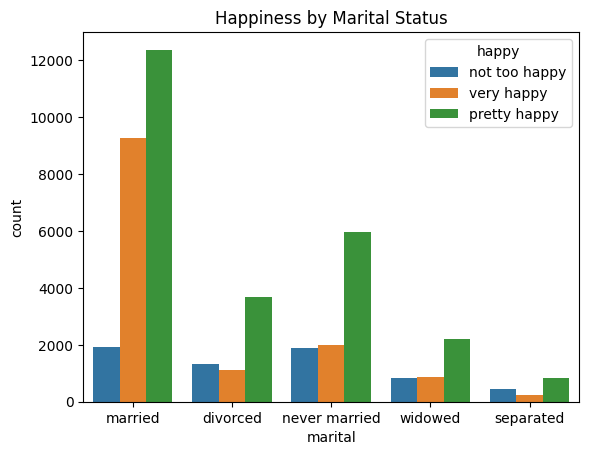

C:\Users\jianp\AppData\Local\Temp\ipykernel_12224\3473163814.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['income'] = pd.Categorical(df1['income'], categories=reversed(income_order), ordered=True)


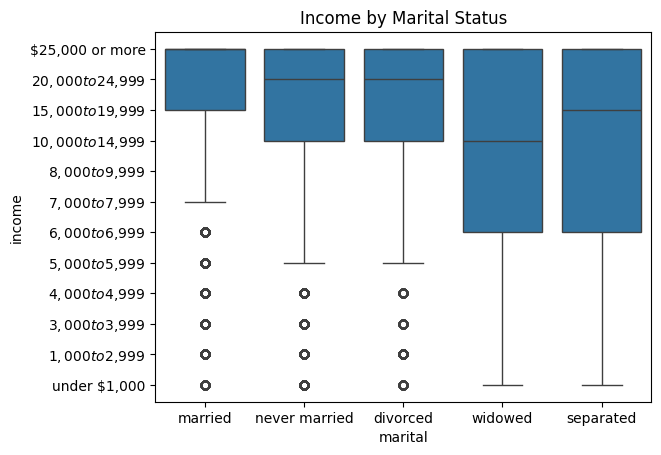

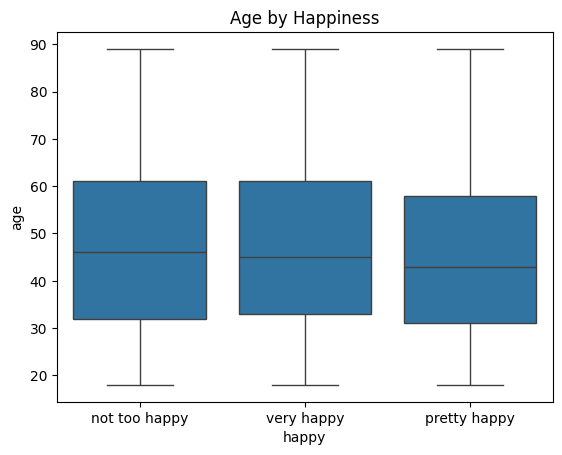

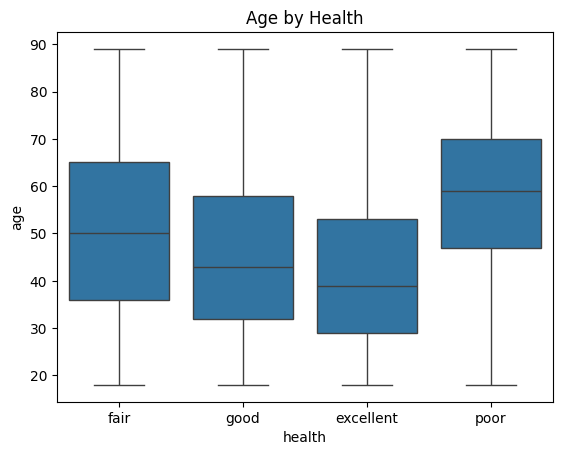

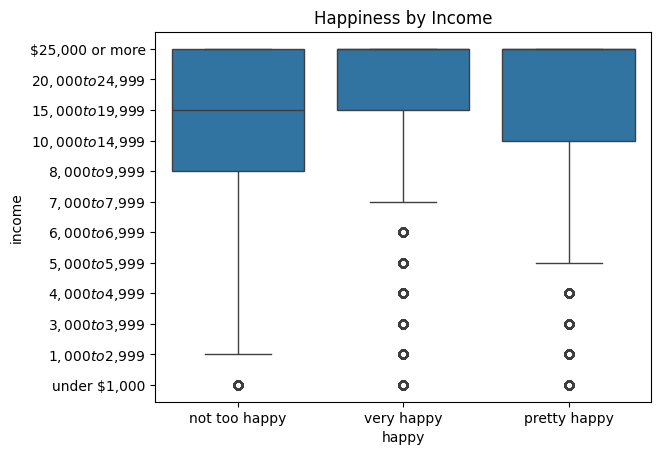

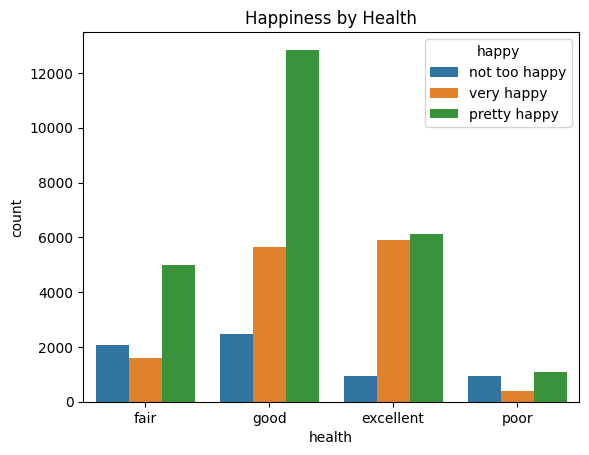

In [67]:
# marital and happy
sns.countplot(x=df1['marital'], hue=df1['happy'])
plt.title("Happiness by Marital Status")
plt.show()

# martial and income
income_order = [
    "under $1,000", "$1,000 to $2,999", "$3,000 to $3,999", "$4,000 to $4,999",
    "$5,000 to $5,999", "$6,000 to $6,999", "$7,000 to $7,999", "$8,000 to $9,999",
    "$10,000 to $14,999", "$15,000 to $19,999", "$20,000 to $24,999", "$25,000 or more"
]
df1['income'] = pd.Categorical(df1['income'], categories=reversed(income_order), ordered=True)
sns.boxplot(x=df1['marital'], y=df1['income'], order=df1['marital'].value_counts().index)
plt.title("Income by Marital Status")
plt.show()

# age and happy
sns.boxplot(x=df1['happy'], y=df1['age'])
plt.title("Age by Happiness")
plt.show()

# age and health
sns.boxplot(x=df1['health'], y=df1['age'])
plt.title("Age by Health")
plt.show()

# happy and income
sns.boxplot(x=df1['happy'], y=df1['income'])
plt.title("Happiness by Income")
plt.show()

# happy and health
sns.countplot(x=df1['health'], hue=df1['happy'])
plt.title("Happiness by Health")
plt.show()


For the marital distribution, most respondents were married, and never married was the 2nd largest group. For the age distribution, the histogram was skewed right so there were fewer older people, and most of the respondents were between 20 and 40. For the happiness distribution, most people were pretty happy, followed by very happy, and lastly not too happy. For the income distribution, the majority of the people made $25000 or more, and the lower income brackets had significantly fewer people. For the health distribution, most people were in good or excellent health.

For happiness by marital status, among all categories, pretty happy is the most common. In all other categories besides married, very happy and not too happy were very close. In the married category, very happy is the 2nd most common and significantly more than not too happy. This means that marriage correlates to more happiness, and there’s no correlation between marital status and happiness for the other categories. For income by marital status, married has the highest income. Never married and divorced have very similar incomes and are both less than the median income of married. Widowed and separated also have similar incomes and the smallest median incomes. This means that being married is correlated with higher income. For age by happiness, all 3 box plots have very similar median ages and ranges. This means there’s no correlation between happiness and age. For age by health, excellent health has the youngest ages, good health has slightly older ages than excellent, fair health has slightly older ages than good, and poor health has the oldest ages. This means as you get older, your health declines. For happiness by income, very happy has the highest income, pretty happy has slightly lower income, and not too happy has the lowest income. This means that a higher income correlates with more happiness. For happiness by health, good and excellent health have pretty happy and very happy as the most common and are both significantly more common than not too happy. For fair and poor health, not too happy is the 2nd most common, and very happy is the 3rd most common. This means that being more healthy correlates with more happiness.